# Signal Efficiency in the Region of Interest for nEXO
This Juptyer notebook calculates the signal efficiency, i.e. the fraction of $ 0\nu\beta\beta$ events that fall within the region of interest (ROI) as defined below. This number will be used in the counting experiment calculations in this [Jupyter Notebook](https://github.com/nEXO-collaboration/sensitivity/blob/sensitivity2020/work/SensitivityPaper2020_scripts/DiscoveryPotential/Counting_Experiment.ipynb)

### Adjusting cell width

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

### Importing packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import uproot # uproot examples: https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf

### Defining cuts
Define cut that selects events that are within the ROI, i.e. passing all standoff quality cuts, the charge-over-light cut, be within the FWHM region around the Q-value as defined in this [Jupyter Notebook](https://github.com/nEXO-collaboration/sensitivity/blob/sensitivity2020/work/SensitivityPaper2020_scripts/DiscoveryPotential/FindEnergyROI.ipynb).

In [3]:
def GetQualityCut(tree):
    cut = np.where((tree['passed_xy_thresh'].array() == True) \
                   & (tree['passed_z_thresh'].array() == True) \
                   & (tree['n_x_ch_abovenoise'].array() > 0) \
                   & (tree['n_y_ch_abovenoise'].array() > 0) \
                   & (tree['m_nOPCal'].array() < (1.077*tree['m_nQ'].array()+313)) \
                   & (tree['m_nOPCal'].array() > (0.597*tree['m_nQ'].array()-216)) \
                   & (tree['standoff'].array() > 20.0) \
                   & (tree['NESTBugFound'].array() == False) \
                  )
    return cut        

In [4]:
def GetNestBugCut(tree):
    cut = np.where((tree['NESTBugFound'].array() == False) & (tree['standoff'].array() > 20.0))
    return cut         

In [5]:
def GetFullCut(tree):
    cut = np.where((tree['passed_xy_thresh'].array() == True) \
                   & (tree['passed_z_thresh'].array() == True) \
                   & (tree['n_x_ch_abovenoise'].array() > 0) \
                   & (tree['n_y_ch_abovenoise'].array() > 0) \
                   & (tree['m_nOPCal'].array() < (1.077*tree['m_nQ'].array()+313)) \
                   & (tree['m_nOPCal'].array() > (0.597*tree['m_nQ'].array()-216)) \
                   & (tree['standoff'].array() > 20.0) \
                   & (tree['energy'].array() > 2435) \
                   & (tree['energy'].array() < 2481) \
                   & (tree['NESTBugFound'].array() == False) \
                  )
    return cut        

### Reading in data from ROOT files

In [6]:
bb0n = uproot.open("/p/vast1/nexo/data/merged-v8/Baseline2019_bb0n_FullLXe.root")['tree']

In [7]:
bkg = uproot.open("/p/vast1/nexo/data/merged-v8/Baseline2019_U238_TPCVessel.root")['tree']

### Applying cuts

In [8]:
bb0n_cut = GetFullCut(bb0n)

In [9]:
bkg_cut = GetFullCut(bkg)

### Signal efficiency after applying precuts

In [10]:
DetectionEfficiency2020 = len(bb0n['energy'].array()[GetQualityCut(bb0n)]) / len(bb0n['energy'].array()[GetNestBugCut(bb0n)])
print('Efficiency for signal events to pass the quality cuts: %.4f' % DetectionEfficiency2020)

Efficiency for signal events to pass the quality cuts: 0.9697


### Signal efficiency in 2017 analysis

In [11]:
SSFraction = 0.79
DetectionEfficiency = 0.98
SignalEfficiency2017 = DetectionEfficiency*SSFraction

### Getting the ROC curve

In [12]:
SignalEfficiency = []
BackgroundMisID = []

bb0n_events = np.array(bb0n['m_DNNvalue'].array()[bb0n_cut])
bkg_events = np.array(bkg['m_DNNvalue'].array()[bkg_cut])

DNNVals = np.arange(0,1,0.01)
for x in DNNVals: 
    bb0n_dnn_cut = np.where(bb0n_events > x)
    bkg_dnn_cut = np.where(bkg_events > x)

    signal = len(bb0n_events[bb0n_dnn_cut]) / len(bb0n_events)
    background = len(bkg_events[bkg_dnn_cut]) / len(bkg_events)
    print("%.2f" % x, "%.3f" % signal, "%.3f" % background)
    
    SignalEfficiency.append(signal)
    BackgroundMisID.append(background)
    
SignalEfficiency = np.array(SignalEfficiency)
BackgroundMisID = np.array(BackgroundMisID)

0.00 1.000 1.000
0.01 0.999 0.936
0.02 0.998 0.815
0.03 0.996 0.721
0.04 0.994 0.650
0.05 0.991 0.595
0.06 0.989 0.551
0.07 0.987 0.514
0.08 0.984 0.481
0.09 0.982 0.451
0.10 0.979 0.426
0.11 0.977 0.403
0.12 0.974 0.383
0.13 0.971 0.365
0.14 0.968 0.349
0.15 0.965 0.334
0.16 0.963 0.320
0.17 0.960 0.306
0.18 0.957 0.294
0.19 0.953 0.281
0.20 0.950 0.269
0.21 0.947 0.258
0.22 0.944 0.247
0.23 0.941 0.237
0.24 0.938 0.227
0.25 0.935 0.218
0.26 0.931 0.209
0.27 0.928 0.202
0.28 0.925 0.193
0.29 0.922 0.186
0.30 0.919 0.178
0.31 0.916 0.172
0.32 0.913 0.166
0.33 0.910 0.160
0.34 0.907 0.154
0.35 0.904 0.149
0.36 0.901 0.143
0.37 0.899 0.138
0.38 0.896 0.133
0.39 0.893 0.129
0.40 0.891 0.124
0.41 0.888 0.120
0.42 0.886 0.116
0.43 0.883 0.113
0.44 0.881 0.109
0.45 0.879 0.105
0.46 0.876 0.102
0.47 0.874 0.100
0.48 0.872 0.097
0.49 0.870 0.095
0.50 0.868 0.092
0.51 0.866 0.090
0.52 0.864 0.088
0.53 0.862 0.086
0.54 0.860 0.084
0.55 0.858 0.082
0.56 0.857 0.080
0.57 0.855 0.079
0.58 0.853 0.0

Find point in the ROC curve where the combined signal efficiency in 2017 is equal to the signal efficiency for the DNN discriminator times the quality cut efficiency (DetectionEfficiency2020) from above

In [13]:
Diff = np.abs(SignalEfficiency*DetectionEfficiency2020 - SignalEfficiency2017)
DNNValCut = np.where(Diff == np.min(Diff))[0][0]

### Plotting the ROC curve

The DNN value that yields the same signal efficient of 0.78 x 0.98 = 0.764 as in the last analysis is: DNN = 0.83


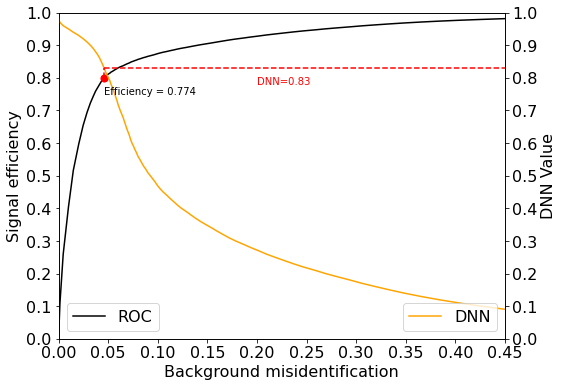

In [14]:
fig, ax1 = plt.subplots(figsize=(8, 6))

plt.xticks(fontsize=16)
plt.yticks(np.arange(0,1.01,0.1), fontsize=16)
plt.xlim(0,0.45)
plt.ylim(0,1)
plt.xlabel('Background misidentification', fontsize=16)
plt.ylabel('Signal efficiency', fontsize=16)

ax1.plot(BackgroundMisID, SignalEfficiency, color='k', label='ROC')
plt.legend(loc='lower left', fontsize=16)

ax2 = ax1.twinx()
ax2.plot(BackgroundMisID, np.arange(0,1,0.01), color='orange', label ='DNN')
plt.ylim(0,1)
plt.ylabel('DNN Value', fontsize=16)
plt.yticks(np.arange(0,1.01,0.1), fontsize=16)
plt.legend(loc='lower right', fontsize=16)

ax2.scatter(BackgroundMisID[DNNValCut], SignalEfficiency[DNNValCut], color='red', s=50)
ax2.axvline(BackgroundMisID[DNNValCut], ymin=SignalEfficiency[DNNValCut], ymax=DNNVals[DNNValCut], color='red', ls ='--')
ax2.axhline(DNNVals[DNNValCut], xmin=BackgroundMisID[DNNValCut]/0.45, xmax=1, color='red', ls ='--')
ax2.text(x=0.2, y=DNNVals[DNNValCut]-0.05, s='DNN=%.2f' % DNNVals[DNNValCut], color='red')
ax2.text(x=BackgroundMisID[DNNValCut], y=SignalEfficiency[DNNValCut]-0.05, s='Efficiency = %.3f' % SignalEfficiency2017, color='k')
plt.savefig('signal_efficiency.pdf', bbox_inches='tight')

print('The DNN value that yields the same signal efficient of 0.78 x 0.98 = 0.764 as in the last analysis is: DNN = %.2f' % DNNVals[DNNValCut])